# Md Khaled Mahmud Shujon

###### Goal: Use of SciPy [1], Matplotlib [2], and explore the ability to Interpolate and Extraplote Data 

Python: Python is a programming language that lets you work quickly and integrate systems more effectively [3].

SciPy: SciPy (pronounced “Sigh Pie”) is an open-source software for mathematics, science, and engineering [1].

In [7]:
from scipy.interpolate import interp1d

Matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible [2].

In [8]:
import matplotlib.pyplot as plt

### Task 1: Create user-defined functions that encode Equation 1 and Equation 2

In [9]:
def equation_1(height: float) -> float:
    distance = 2 * ((5/7) ** 0.5) * height
    return distance

def equation_2(height: float) -> float:
    distance = -0.0013 * (height ** 2) + 2.69 * height + 32.18
    return distance


### Task 2: Compute the Root-Mean-Squared-Error (RMSE) value for the following, and comment:

        1. Galileo's five experimental measurements versus the corresponding values by Equation 1, and
        2. Galileo's five experimental measurements versus the corresponding values by Equation 2.

        Recall that RMSE is defined as : 
        RMSE = sqrt(1/n * Σ(xᵢ(Calculated) - Yᵢ(Experiment))²)

- Zip, https://www.w3schools.com/python/ref_func_zip.asp

In [10]:
#Computing Root-Mean-Squared-Error (RMSE) values

def calculate_rmse(experimental_distance, calculated_distance) -> float: 
    """
    calculates the root-mean-squared error (RMSE) between a list of experimental distance and calculated distance.
    input: list - experimental distance
           list - calculated distance 
           
    return: Result -RMSE
    """
    
    diff = [(cal - exp) ** 2 for cal, exp in zip(calculated_distance, experimental_distance)]

    n = len(diff)
    sum = 0.0
    for x in diff:
        sum += x
    mean_sum = sum/n
    rmse = (mean_sum)**0.5 
    return rmse


# Given experimental measurements
experimental_height = [300, 600, 800, 828, 1000]
experimental_distance = [800, 1172, 1328, 1340, 1500]

# Calculating RMSE values for Equation 1 and Equation 2
calculated_distance_eq1 = [equation_1(h) for h in experimental_height]
calculated_distance_eq2 = [equation_2(h) for h in experimental_height]

rmse_eq1 = calculate_rmse(experimental_distance, calculated_distance_eq1)
rmse_eq2 = calculate_rmse(experimental_distance, calculated_distance_eq2)

print("RMSE (Equation 1):", rmse_eq1)
print("RMSE (Equation 2):", rmse_eq2)


RMSE (Equation 1): 173.8129935702819
RMSE (Equation 2): 52.0236722745329


### Task 3: SciPy's 'interp1d' is able to interpolate and extrapolate new data using existing data.

        Interpolating means creating new dependent variable (e.g., distance) data within the existing range of the    
        independent variable (e.g., height). Extrapolating means creating new dependent variable data beyond the   
        existing independent variable values.

        Using 'interp1d', generate data using the following different kinds of extrapolations:'linear','quadratic',   
        'cubic','nearest','previous' and 'next'. For this, use an input height range from 0 to 1000 "points" for 
        'inter1d' 'X' parameter (resulting in both interpolate and extrapolated data).

- interp1d, https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html

In [11]:
# Given experimental measurements
experimental_height = [300, 600, 800, 828, 1000]
experimental_distance = [800, 1172, 1328, 1340, 1500]

# Creating interp1d function for linear, quadratic, cubic, nearest, previous, and next extrapolation
linear_exterp = interp1d(experimental_height, experimental_distance, kind='linear', fill_value="extrapolate")
quadratic_exterp = interp1d(experimental_height, experimental_distance, kind='quadratic', fill_value="extrapolate")
cubic_exterp = interp1d(experimental_height, experimental_distance, kind='cubic', fill_value="extrapolate")
nearest_exterp = interp1d(experimental_height, experimental_distance, kind='nearest', fill_value="extrapolate")
previous_exterp = interp1d(experimental_height, experimental_distance, kind='previous', fill_value="extrapolate")
next_exterp = interp1d(experimental_height, experimental_distance, kind='next', fill_value="extrapolate")

# Input height range for interpolation and extrapolation
height_range = [h for h in range(0, 1001)]

# Calculating distances using different extrapolation methods
linear_distances = linear_exterp(height_range)
quadratic_distances = quadratic_exterp(height_range)
cubic_distances = cubic_exterp(height_range)
nearest_distances = nearest_exterp(height_range)
previous_distances = previous_exterp(height_range)
next_distances = next_exterp(height_range)

# Showing the extrapolated distances
print("Linear Extrapolation Distances:")
print(linear_distances)
print("\nQuadratic Extrapolation Distances:")
print(quadratic_distances)
print("\nCubic Extrapolation Distances:")
print(cubic_distances)
print("\nNearest Extrapolation Distances:")
print(nearest_distances)
print("\nPrevious Extrapolation Distances:")
print(previous_distances)
print("\nNext Extrapolation Distances:")
print(next_distances)


Linear Extrapolation Distances:
[ 428.          429.24        430.48       ... 1498.13953488 1499.06976744
 1500.        ]

Quadratic Extrapolation Distances:
[ 282.56303006  284.52940693  286.49416783 ... 1497.23200232 1498.61333195
 1500.        ]

Cubic Extrapolation Distances:
[ 450.95930133  451.85011044  452.74352378 ... 1496.00381812 1497.99236886
 1500.        ]

Nearest Extrapolation Distances:
[ 800.  800.  800. ... 1500. 1500. 1500.]

Previous Extrapolation Distances:
[  nan   nan   nan ... 1340. 1340. 1500.]

Next Extrapolation Distances:
[ 800.  800.  800. ... 1500. 1500. 1500.]


### Task 4: Visualization and Compare
        1. Plot Galileo's experimentally measured data and the data 
           given by Equation 1 and Equation 2,
        2. Plot Galileo's experimentally measured data and the new 
           data from Task 3, and 
        3. Briefly comment on any observations that you make.




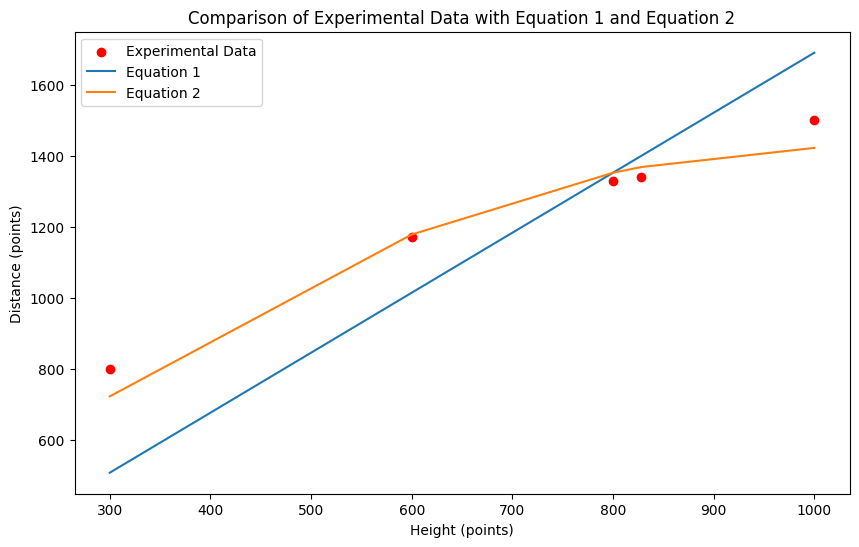

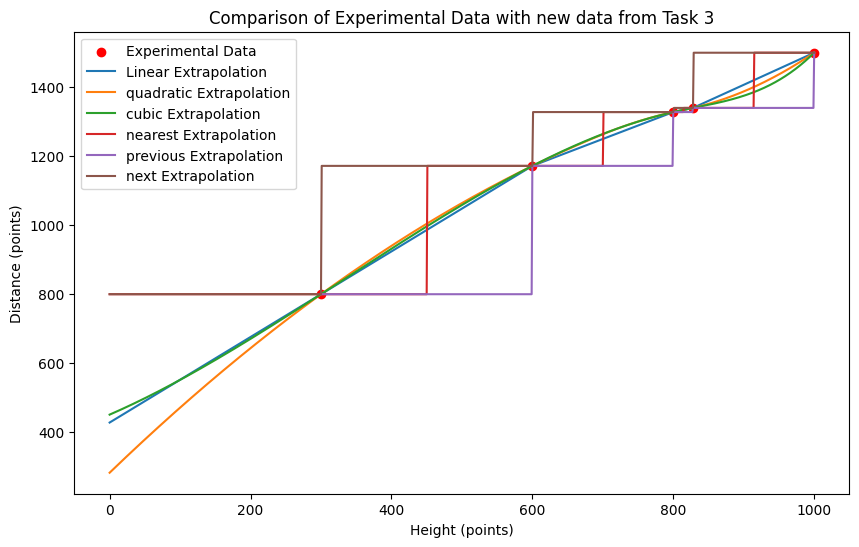

In [12]:
# Given experimental measurements
experimental_height = [300, 600, 800, 828, 1000]
experimental_distance = [800, 1172, 1328, 1340, 1500]

# Input height range for plotting
height_range = [h for h in range(0, 1001)]

# Plotting Galileo's experimental data and data from Equations 1 and 2
plt.figure(figsize=(10, 6))
plt.scatter(experimental_height, experimental_distance, label="Experimental Data", color="Red")
plt.plot(experimental_height, calculated_distance_eq1 , label="Equation 1")
plt.plot(experimental_height, calculated_distance_eq2, label="Equation 2")
plt.xlabel("Height (points)")
plt.ylabel("Distance (points)")
plt.title("Comparison of Experimental Data with Equation 1 and Equation 2")
plt.legend()
plt.show()

# Plotting Galileo's experimental data and new data from Task 3
plt.figure(figsize=(10, 6))
plt.scatter(experimental_height, experimental_distance, label="Experimental Data", color="Red")
plt.plot(height_range, linear_distances, label="Linear Extrapolation")
plt.plot(height_range, quadratic_distances, label="quadratic Extrapolation")
plt.plot(height_range, cubic_distances, label="cubic Extrapolation")
plt.plot(height_range, nearest_distances, label="nearest Extrapolation")
plt.plot(height_range, previous_distances, label="previous Extrapolation")
plt.plot(height_range, next_distances, label="next Extrapolation")
plt.xlabel("Height (points)")
plt.ylabel("Distance (points)")
plt.title("Comparison of Experimental Data with new data from Task 3")
plt.legend()
plt.show()


## References

[1] Virtanen, P., Gommers, R. Oliphant, T.E. et al. & SciPy 1.0 Contributors, SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python Nature Methods, 2020, 17, 261-272.

[2] Hunter, J.D., Matplotlib: A 2D Graphics environment, IEEE Annals of the History of Computing, 9, 2007, 90-95.

[3] Python Software Foundation. Python Language Reference, version 3.11. Available at http://www.python.org, Accessed on 12 July2023.